In [25]:
import warnings

import numpy as np
from imblearn.pipeline import Pipeline
from matplotlib import pyplot as plt

warnings.simplefilter(action='ignore')

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix

sns.set(rc={'figure.figsize':(10, 8)})

In [2]:
df_ForestImputer = pd.read_csv('../../Train_music_ForestImputer.csv')
df_ForestImputer

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4.810120e+10,0.0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,4.810425e+10,0.0,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,4.811813e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,4.810105e+10,0.0,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,4.830019e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.894477e+09,1.0,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,4.875985e+09,0.0,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,4.811248e+09,0.0,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,4.896164e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [3]:
X = df_ForestImputer.drop(['target'], axis=1)
y = df_ForestImputer.target

In [4]:
X.drop(['id'], axis=1, inplace=True)
X

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,1.0,25.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [5]:
selector_100 = SelectKBest(f_classif, k=100)
selector_100.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols_100 = selector_100.get_support(indices=True)
df_new_100 = X.iloc[:,cols_100]

In [6]:
scaler = StandardScaler()
df_new_100 = scaler.fit_transform(df_new_100)

In [7]:
df_new_100

array([[-0.49491972, -0.29708197, -1.00193147, ..., -0.4140771 ,
        -0.26601647, -0.22551651],
       [-0.49491972, -0.29708197, -1.5903347 , ..., -0.37724397,
        -0.38109724, -0.33350717],
       [-0.49491972, -0.29708197,  1.03724168, ..., -0.45834618,
        -0.39559254, -0.28761456],
       ...,
       [-0.49491972, -0.29708197,  0.86588853, ..., -0.39035894,
        -0.38831039, -0.34923933],
       [-0.49491972, -0.29708197, -0.46331898, ..., -0.36318049,
        -0.39052684, -0.33763215],
       [-0.49491972, -0.29708197,  0.58538111, ...,  1.00830965,
         0.63451393, -0.23085354]])

In [8]:
def count(df_y):
    a = df_y[df_y == 0].count()
    b = df_y[df_y == 1].count()
    print("Will not download", a)
    print("Will download", b)
    print("Not download / Will download", a/b)
    return a/b

In [9]:
def makeScore(model):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    accuracy = accuracy_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))

    print(confusion_matrix(y_test, model.predict(X_test)))
    print("ROC_AUC: %.5f%%" % (roc_auc * 100.0))
    print("F1_score: %.5f%%" % (f1 * 100.0))
    print("Accuracy: %.5f%%" % (accuracy * 100.0))
    print("Recall: %.5f%%" % (recall * 100.0))
    print("Precision: %.5f%% "% (precision * 100.0))

In [23]:
def plot_validation_curve(model_grid, param_name, params=None):
    # Рисуем валидационную кривую
    # По оси х --- значения гиперпараметров (param_***)
    # По оси y --- значения метрики (mean_test_score)

    results_df = pd.DataFrame(model_grid.cv_results_)

    if params == None:
        plt.plot(results_df['param_'+param_name], results_df['mean_test_score'])
    else:
        plt.plot(params, results_df['mean_test_score'])

    # Подписываем оси и график
    plt.xlabel(param_name)
    plt.ylabel('Test F1 score')
    plt.title('Validation curve')
    plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_new_100, y, test_size=0.2, random_state=42)

In [12]:
print("\n\tIMBALANCED CLASS\n")
difference = count(y_train)
model = XGBClassifier(scale_pos_weight = difference, use_rmm = 'true', eval_metric='mlogloss').fit(X_train, y_train)
print()
makeScore(model)


print("\n\tRANDOM OVERSAMPLING\n")
oversample = RandomOverSampler(random_state= 42, sampling_strategy = 'minority')
X_ros, y_ros = oversample.fit_resample(X_train, y_train)
model = XGBClassifier(use_rmm = 'true', eval_metric='mlogloss').fit(X_ros, y_ros)
count(y_ros)
print()
makeScore(model)


print("\n\tRANDOM UNDERSAMPLING\n")
undersample = RandomUnderSampler(random_state= 42, sampling_strategy = 'majority')
X_rus, y_rus = undersample.fit_resample(X_train, y_train)
model = XGBClassifier(use_rmm = 'true', eval_metric='mlogloss').fit(X_rus, y_rus)
count(y_rus)
print()
makeScore(model)


print("\n\tRANDOM OVERSEMPLING AND UNDERSAMPLING\n")
over = RandomOverSampler(random_state=42, sampling_strategy=0.2)
X_rous, y_rous = over.fit_resample(X_train, y_train)
under = RandomUnderSampler(random_state=42, sampling_strategy=0.9) # sampling_strategy = float - количество выборок в классе большинства после повторной выборки и количество выборок в классе меньшинства, соответственно.
X_rous, y_rous = under.fit_resample(X_rous, y_rous)
model = XGBClassifier(use_rmm = 'true', eval_metric='mlogloss').fit(X_rous, y_rous)
count(y_rous)
print()
makeScore(model)


	IMBALANCED CLASS

Will not download 14792
Will download 1208
Not download / Will download 12.245033112582782

[[3545  167]
 [ 225   63]]
ROC_AUC: 58.68804%
F1_score: 24.32432%
Accuracy: 90.20000%
Recall: 21.87500%
Precision: 27.39130% 

	RANDOM OVERSAMPLING

Will not download 14792
Will download 14792
Not download / Will download 1.0

[[3567  145]
 [ 224   64]]
ROC_AUC: 59.15799%
F1_score: 25.75453%
Accuracy: 90.77500%
Recall: 22.22222%
Precision: 30.62201% 

	RANDOM UNDERSAMPLING

Will not download 1208
Will download 1208
Not download / Will download 1.0

[[2601 1111]
 [  83  205]]
ROC_AUC: 70.62530%
F1_score: 25.56110%
Accuracy: 70.15000%
Recall: 71.18056%
Precision: 15.57751% 

	RANDOM OVERSEMPLING AND UNDERSAMPLING

Will not download 3286
Will download 2958
Not download / Will download 1.1108857336037863

[[3220  492]
 [ 144  144]]
ROC_AUC: 68.37284%
F1_score: 31.16883%
Accuracy: 84.10000%
Recall: 50.00000%
Precision: 22.64151% 


In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
params={'eta': [0.01, 0.1, 0.2, 0.3], 'gamma':np.arange(0.1,0.6,0.1), "n_estimators": np.arange(50, 201, 50)}
model = XGBClassifier(scale_pos_weight = difference, use_rmm = 'true')

grid = GridSearchCV(model, params, cv=kf, scoring='f1', n_jobs = -1)
grid.fit(df_new_100, y)

[18:56:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weigh...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None,
                                     scale_pos_wei

In [15]:
print("Найлучшее качество модели при", grid.best_params_)
print("Наилучшая оценка качества модели:", grid.best_score_)

Найлучшее качество модели при {'eta': 0.2, 'gamma': 0.5, 'n_estimators': 50}
Наилучшая оценка качества модели: 0.3304974083083055


In [16]:
steps = [('under', RandomUnderSampler(sampling_strategy = 'majority', random_state=42)), ('model', XGBClassifier(use_rmm = 'true'))]
pipeline = Pipeline(steps=steps)

params={
    'model__eta': [0.01, 0.1, 0.2, 0.3],
    'model__gamma':np.arange(0.1,0.6,0.1),
    'model__n_estimators': np.arange(50, 201, 50)
}
grid = GridSearchCV(pipeline, params, cv=kf, scoring='f1', n_jobs = -1)
grid.fit(df_new_100, y)

[19:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('under',
                                        RandomUnderSampler(random_state=42,
                                                           sampling_strategy='majority')),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=Non...
                                                      num_para

In [17]:
# scores = cross_val_score(pipeline, df_new_50, y, scoring='roc_auc', cv=kf, n_jobs=-1)
# print(scores)
# print(statistics.mean(scores))
print("Найлучшее качество модели при", grid.best_params_)
print("Наилучшая оценка качества модели:", grid.best_score_)

Найлучшее качество модели при {'model__eta': 0.1, 'model__gamma': 0.30000000000000004, 'model__n_estimators': 50}
Наилучшая оценка качества модели: 0.28065406717266805


In [18]:
steps = [('over', RandomOverSampler(sampling_strategy = 'minority', random_state=42)), ('model', XGBClassifier(use_rmm = 'true'))]
pipeline = Pipeline(steps=steps)

params={
    'model__eta': [0.01, 0.1, 0.2, 0.3],
    'model__gamma':np.arange(0.1,0.6,0.1),
    'model__n_estimators': np.arange(50, 201, 50)
}
grid = GridSearchCV(pipeline, params, cv=kf, scoring='f1', n_jobs = -1)
grid.fit(df_new_100, y)

[19:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy='minority')),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,...
                                                      num_paral

In [20]:
print("Найлучшее качество модели при", grid.best_params_)
print("Наилучшая оценка качества модели:", grid.best_score_)

Найлучшее качество модели при {'model__eta': 0.1, 'model__gamma': 0.30000000000000004, 'model__n_estimators': 100}
Наилучшая оценка качества модели: 0.32700818878169663


In [21]:
steps = [('over', RandomOverSampler(random_state=42, sampling_strategy=0.2)), ('under', RandomUnderSampler(random_state=42, sampling_strategy=0.9)) ,('model', XGBClassifier(use_rmm = 'true'))]
pipeline = Pipeline(steps=steps)

params={
    'model__eta': [0.01, 0.1, 0.2, 0.3],
    'model__gamma':np.arange(0.1,0.6,0.1),
    'model__n_estimators': np.arange(50, 201, 50)
}
grid = GridSearchCV(pipeline, params, cv=kf, scoring='f1', n_jobs = -1)
grid.fit(df_new_100, y)

[19:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=42,
                                                          sampling_strategy=0.2)),
                                       ('under',
                                        RandomUnderSampler(random_state=42,
                                                           sampling_strategy=0.9)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_c...
                                 

In [22]:
print("Найлучшее качество модели при", grid.best_params_)
print("Наилучшая оценка качества модели:", grid.best_score_)

Найлучшее качество модели при {'model__eta': 0.2, 'model__gamma': 0.30000000000000004, 'model__n_estimators': 200}
Наилучшая оценка качества модели: 0.33909550361777924


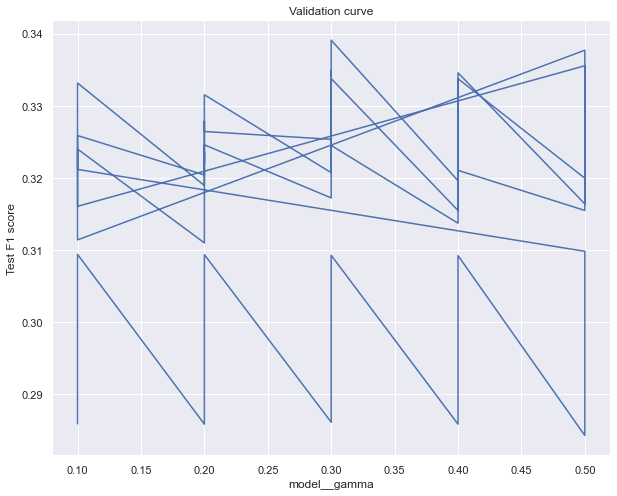

In [27]:
plot_validation_curve(grid, 'model__gamma')